In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('thresholding_dataset230724.csv')

In [3]:
##fliter out before and after crushing
filtered_data = df[~df['name_'].isin(['cam1_060424', 'cam1_070424', 'cam1_090424','cam2_190524', 'cam2_210524',
                                        'cam2_230524', 'cam2_240524', 'cam1_050624', 'cam1_060624','cam1_080624',
                                        'cam_1_210624', 'cam_1_230624', 'cam_1_240624'])]

In [4]:
def sum_pc_every_n_rows(group,num_row):
    return group.groupby(group.index // num_row)['PC'].sum().reset_index(drop=True)

In [5]:
df10min = filtered_data.groupby(['class','event','name_'],dropna = False).apply(sum_pc_every_n_rows,2).reset_index()
df10min.drop(columns = ['level_3'], inplace = True)

In [6]:
def describe_pc_every_n_rows(group,num_row):
    return group.groupby(group.index // num_row)['PC'].describe().reset_index(drop=True)

In [7]:
df60min_summary = df10min.groupby(['class','event','name_'],dropna = False).apply(describe_pc_every_n_rows,6).reset_index()

In [8]:
print('describe statistic every 1 hour usig 10 min PC dataset')
##use only 6 menbers(1 hr.) summary
df60min_summary = df60min_summary[(df60min_summary['count'] == 6)]
df60min_summary

describe statistic every 1 hour usig 10 min PC dataset


,class,event,name_,level_3,count,mean,std,min,25%,50%,75%,max
0,crush,0.0,cam1_080424,0,6.0,12.166667,4.262237,9.0,9.25,10.5,13.25,20.0
1,crush,0.0,cam1_080424,1,6.0,19.000000,8.294577,4.0,16.75,21.5,24.75,26.0
2,crush,0.0,cam1_080424,2,6.0,9.666667,5.354126,2.0,6.50,11.0,11.75,17.0
3,crush,0.0,cam1_080424,3,6.0,14.500000,11.166915,0.0,7.00,13.5,23.75,28.0
4,crush,0.0,cam1_080424,4,6.0,6.333333,4.412105,0.0,4.00,6.5,9.00,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
214,normal,NaN,3110,10,6.0,4.333333,3.011091,0.0,2.50,4.5,6.50,8.0
215,normal,NaN,3110,11,6.0,8.666667,5.240865,4.0,5.00,6.5,11.75,17.0
216,normal,NaN,3110,12,6.0,9.333333,12.323419,0.0,2.00,5.0,10.25,33.0
217,normal,NaN,3110,13,6.0,13.333333,5.202563,4.0,11.75,15.0,16.75,18.0


In [9]:
####package install for id3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
#Dataset for tree
df_tree = df60min_summary.drop(columns = ['event', 'name_', 'level_3', 'count'])
#Building tree


(0.0, 1.0, 0.0, 1.0)

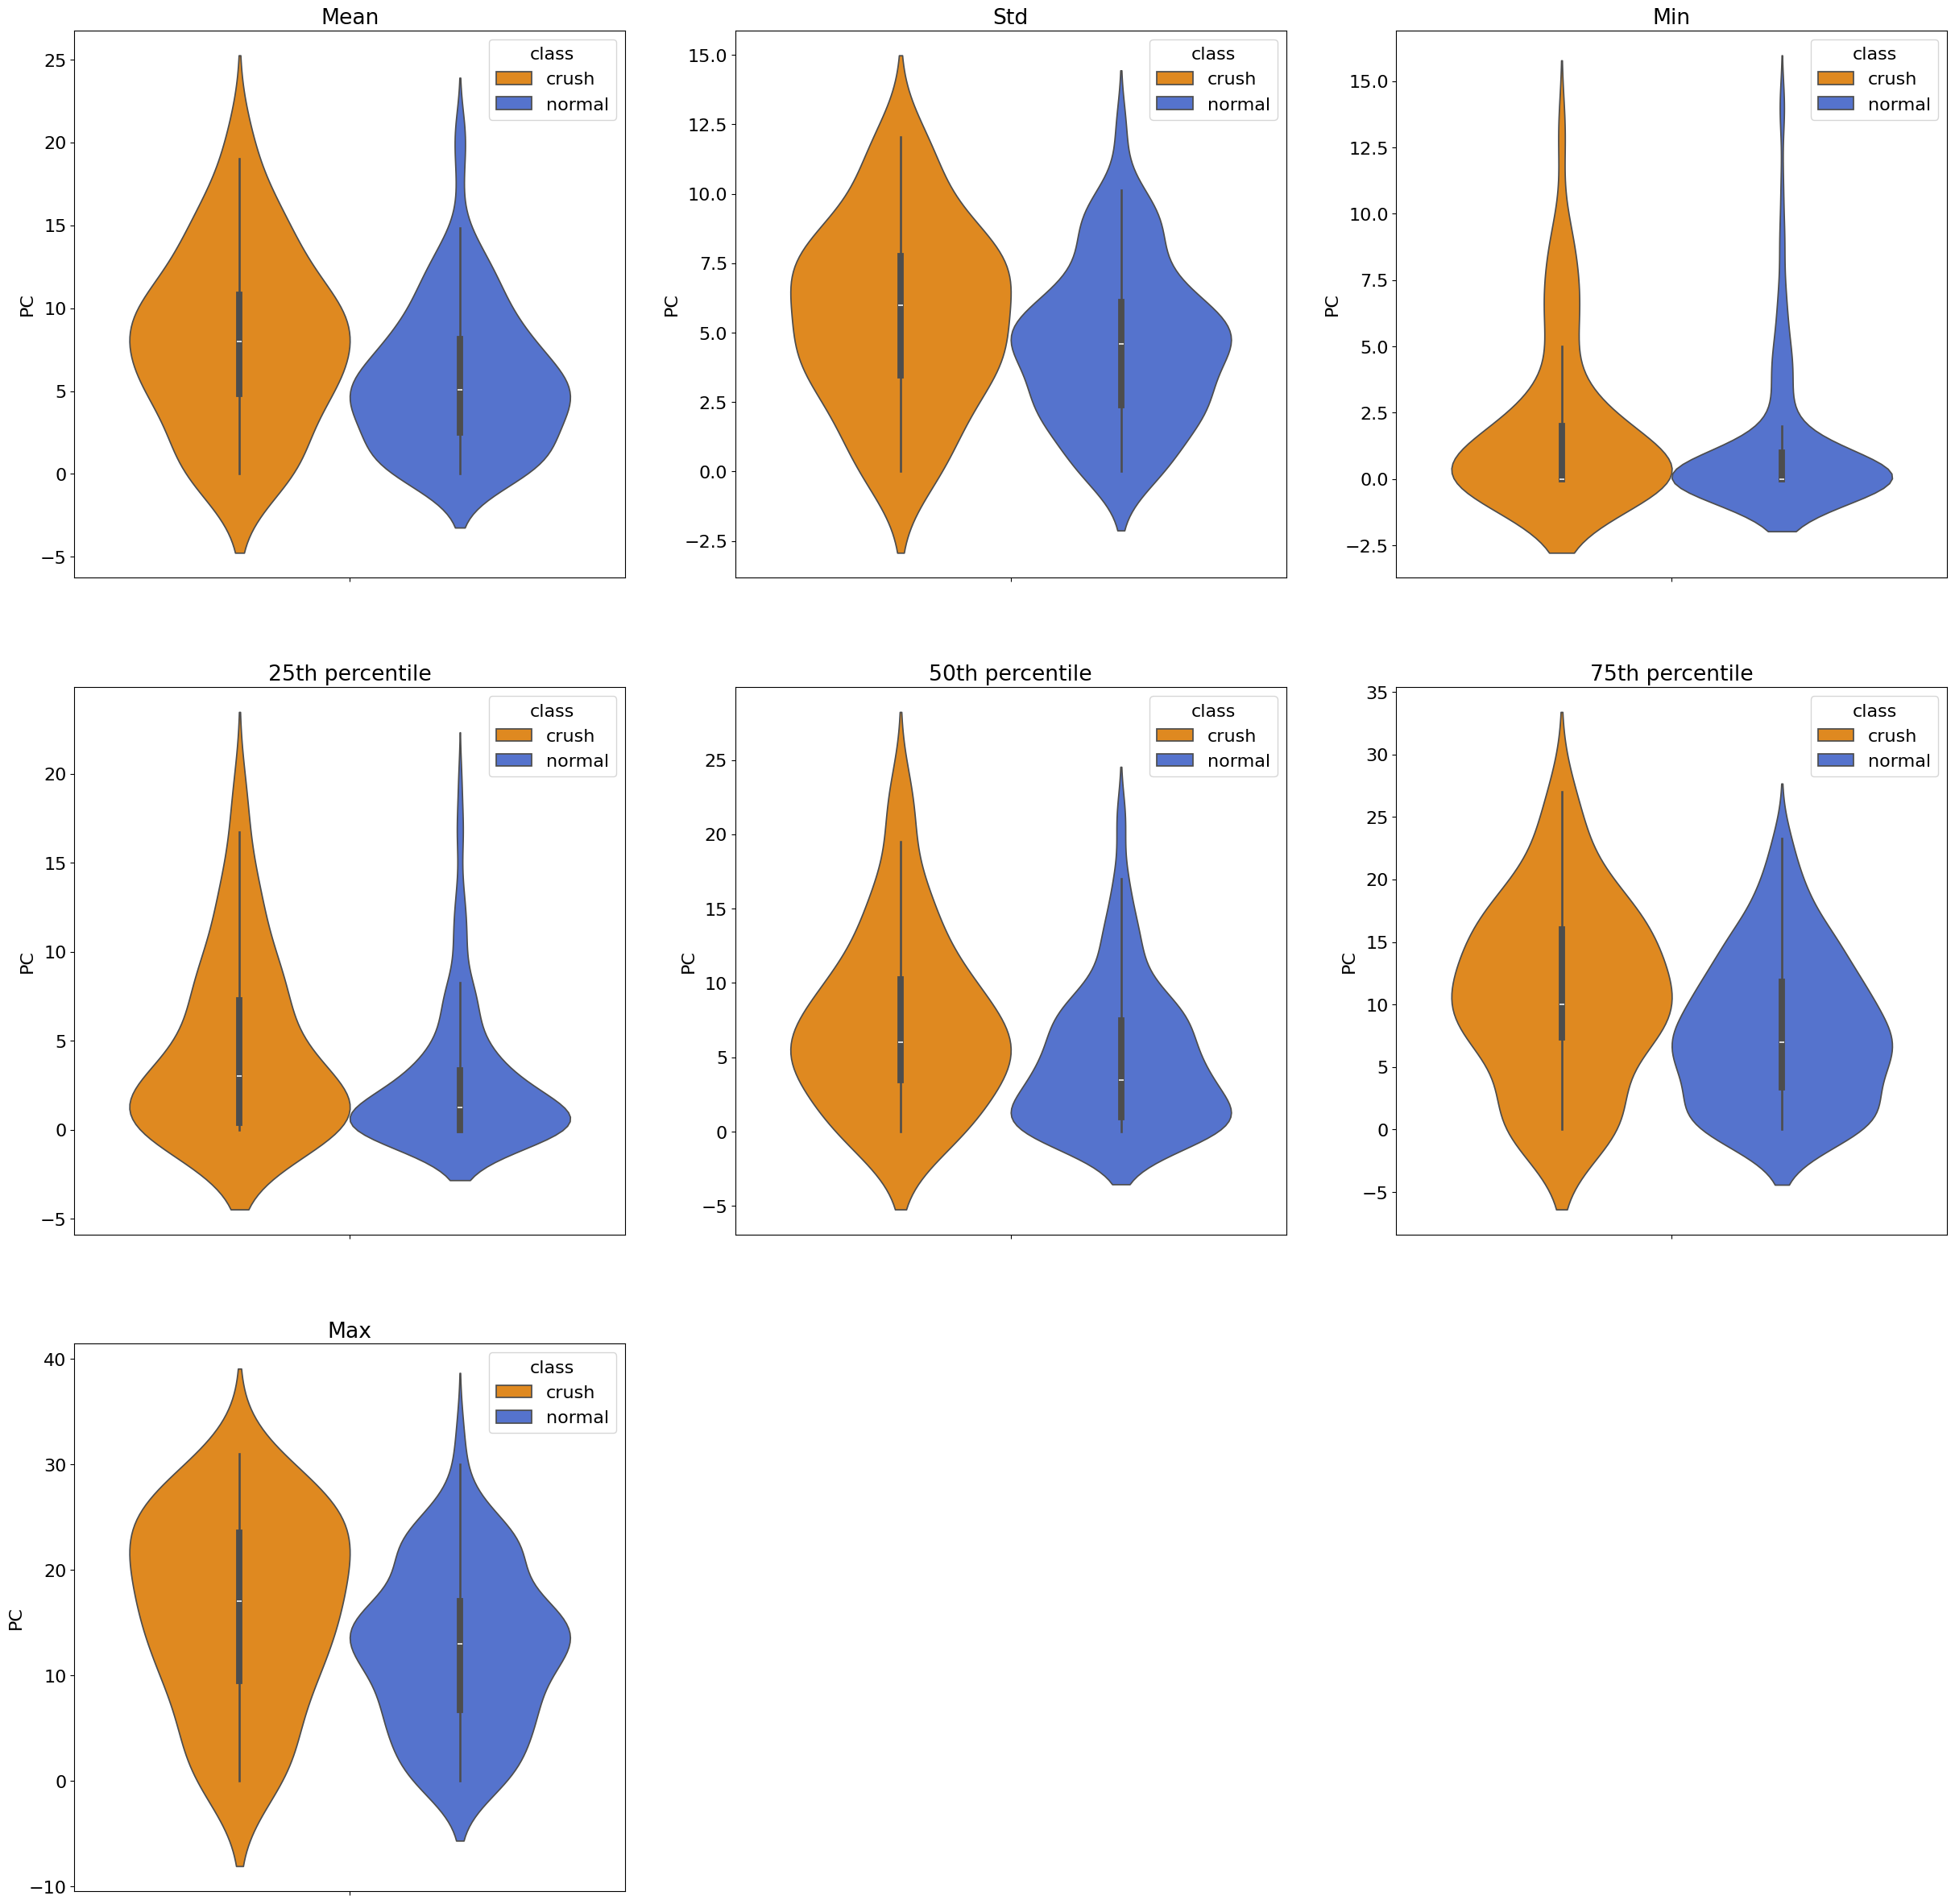

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(30, 30))
plt.rcParams.update({'font.size': 16})
ax1 = sn.violinplot(ax = axs[0,0], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = 'mean', palette = ['darkorange','royalblue'])
sn.move_legend(ax1, "best")
ax1.set_title("Mean")
ax1.set_ylabel("PC")

ax2 = sn.violinplot(ax = axs[0,1], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = 'std', palette = ['darkorange','royalblue'])
sn.move_legend(ax1, "best")
ax2.set_title("Std")
ax2.set_ylabel("PC")

ax3 = sn.violinplot(ax = axs[0,2], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = 'min', palette = ['darkorange','royalblue'])
sn.move_legend(ax1, "best")
ax3.set_title("Min")
ax3.set_ylabel("PC")

ax4 = sn.violinplot(ax = axs[1,0], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = '25%', palette = ['darkorange','royalblue'])
sn.move_legend(ax1, "best")
ax4.set_title("25th percentile")
ax4.set_ylabel("PC")

ax5 = sn.violinplot(ax = axs[1,1], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = '50%', palette = ['darkorange','royalblue'])
sn.move_legend(ax1, "best")
ax5.set_title("50th percentile")
ax5.set_ylabel("PC")

ax6 = sn.violinplot(ax = axs[1,2], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = '75%', palette = ['darkorange','royalblue'])
sn.move_legend(ax1, "best")
ax6.set_title("75th percentile")
ax6.set_ylabel("PC")

ax7 = sn.violinplot(ax = axs[2,0], data = df_tree[['mean','std','min','25%','50%','75%','max','class']], hue ='class' , y = 'max', palette = ['darkorange','royalblue'])
sn.move_legend(ax1, "best")
ax7.set_title("Max")
ax7.set_ylabel("PC")

axs[2,1].axis('off')
axs[2, 2].axis('off')

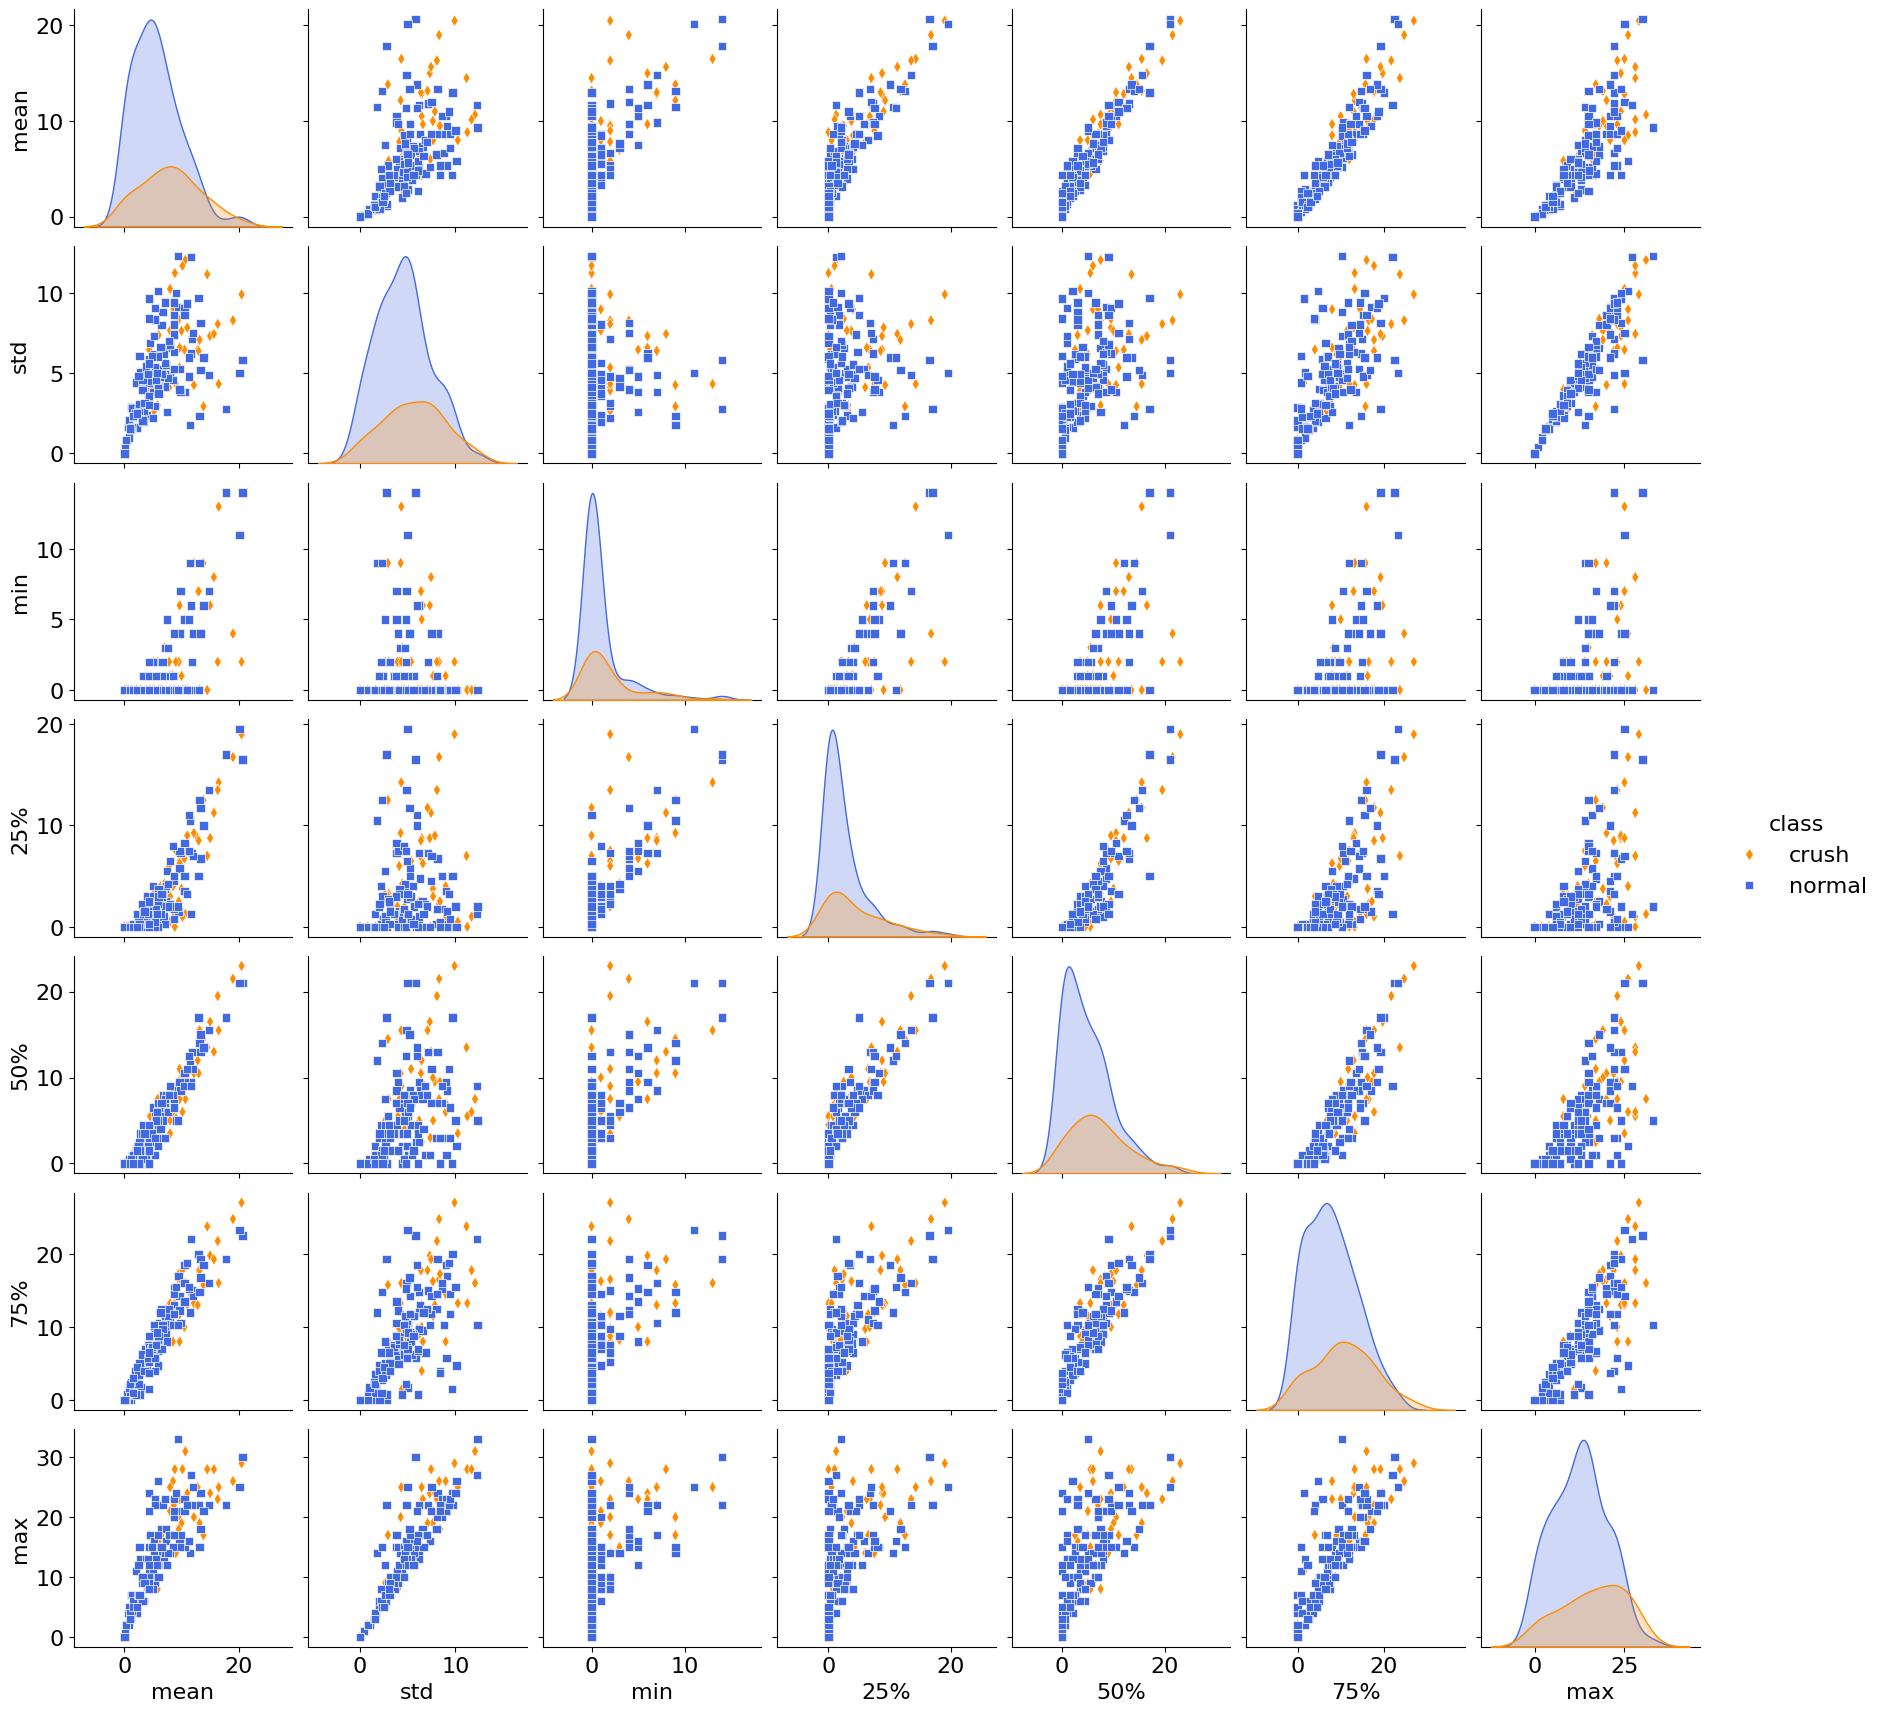

In [29]:
plt.rcParams.update({'font.size': 16})
sn.pairplot(df_tree[['mean','std','min','25%','50%','75%','max','class']], hue = 'class', palette = ['darkorange','royalblue'], markers=["d", "s"])

In [49]:
X = df_tree[['mean','std','min','25%','50%','75%','max']]
y = df_tree['class']

In [50]:
le = LabelEncoder()
le.fit(y)

print('label members: ',le.classes_)
print('transform "crush" to', le.transform(['crush', 'normal'])[0],end = '\n')
print('transform "normal" to', le.transform(['crush', 'normal'])[1])

y = le.transform(y)

label members:  ['crush' 'normal']
transform "crush" to 0
transform "normal" to 1


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,make_scorer

In [16]:
parameters = {'max_depth':[3,5,7,9,11,None], 'criterion':['gini','entropy','log_loss'], 'min_samples_split':[0.05,0.1,0.2] }
scoring = {'accuracy' : make_scorer(accuracy_score), 'f1' : make_scorer(f1_score,pos_label=0), 'precision' : make_scorer(precision_score,pos_label=0), 'Sensitivity': make_scorer(recall_score,pos_label=0),'Specificity': make_scorer(recall_score,pos_label=1)}
model = tree.DecisionTreeClassifier(random_state = 42)
clf = GridSearchCV(model, parameters,
                   scoring = scoring,
                   refit = 'Sensitivity',
                   cv = 5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11, None],
                         'min_samples_split': [0.05, 0.1, 0.2]},
             refit='Sensitivity',
             scoring={'Sensitivity': make_scorer(recall_score, response_method='predict', pos_label=0),
                      'Specificity': make_scorer(recall_score, response_method='predict', pos_label=1),
                      'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', pos_label=0),
                      'precision': make_scorer(precision_score, response_method='predict', pos_label=0)})

In [17]:
for i,j,k,l,m,n in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_accuracy'],
                    clf.cv_results_['mean_test_f1'],
                    clf.cv_results_['mean_test_precision'],
                    clf.cv_results_['mean_test_Sensitivity'],
                    clf.cv_results_['mean_test_Specificity']):
    print(f'Parameter[{i}], accuracy = {"%.2f" %j}, f1 = {"%.2f" %k}, precision = {"%.2f" %l}, Sensitivity = {"%.2f" %m}, Specificity = {"%.2f" %n}')

Parameter[{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.05}], accuracy = 0.71, f1 = 0.22, precision = 0.44, Sensitivity = 0.18, Specificity = 0.90
Parameter[{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.1}], accuracy = 0.71, f1 = 0.22, precision = 0.44, Sensitivity = 0.18, Specificity = 0.90
Parameter[{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.2}], accuracy = 0.73, f1 = 0.25, precision = 0.47, Sensitivity = 0.18, Specificity = 0.93
Parameter[{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.05}], accuracy = 0.70, f1 = 0.35, precision = 0.46, Sensitivity = 0.32, Specificity = 0.84
Parameter[{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.1}], accuracy = 0.71, f1 = 0.34, precision = 0.45, Sensitivity = 0.29, Specificity = 0.86
Parameter[{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.2}], accuracy = 0.73, f1 = 0.35, precision = 0.58, Sensitivity = 0.26, Specificity = 0.90
Parameter[{'criterion': 'gini', 

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = 11, criterion = 'entropy',min_samples_split = 0.05, random_state = 42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11,
                       min_samples_split=0.05, random_state=42)

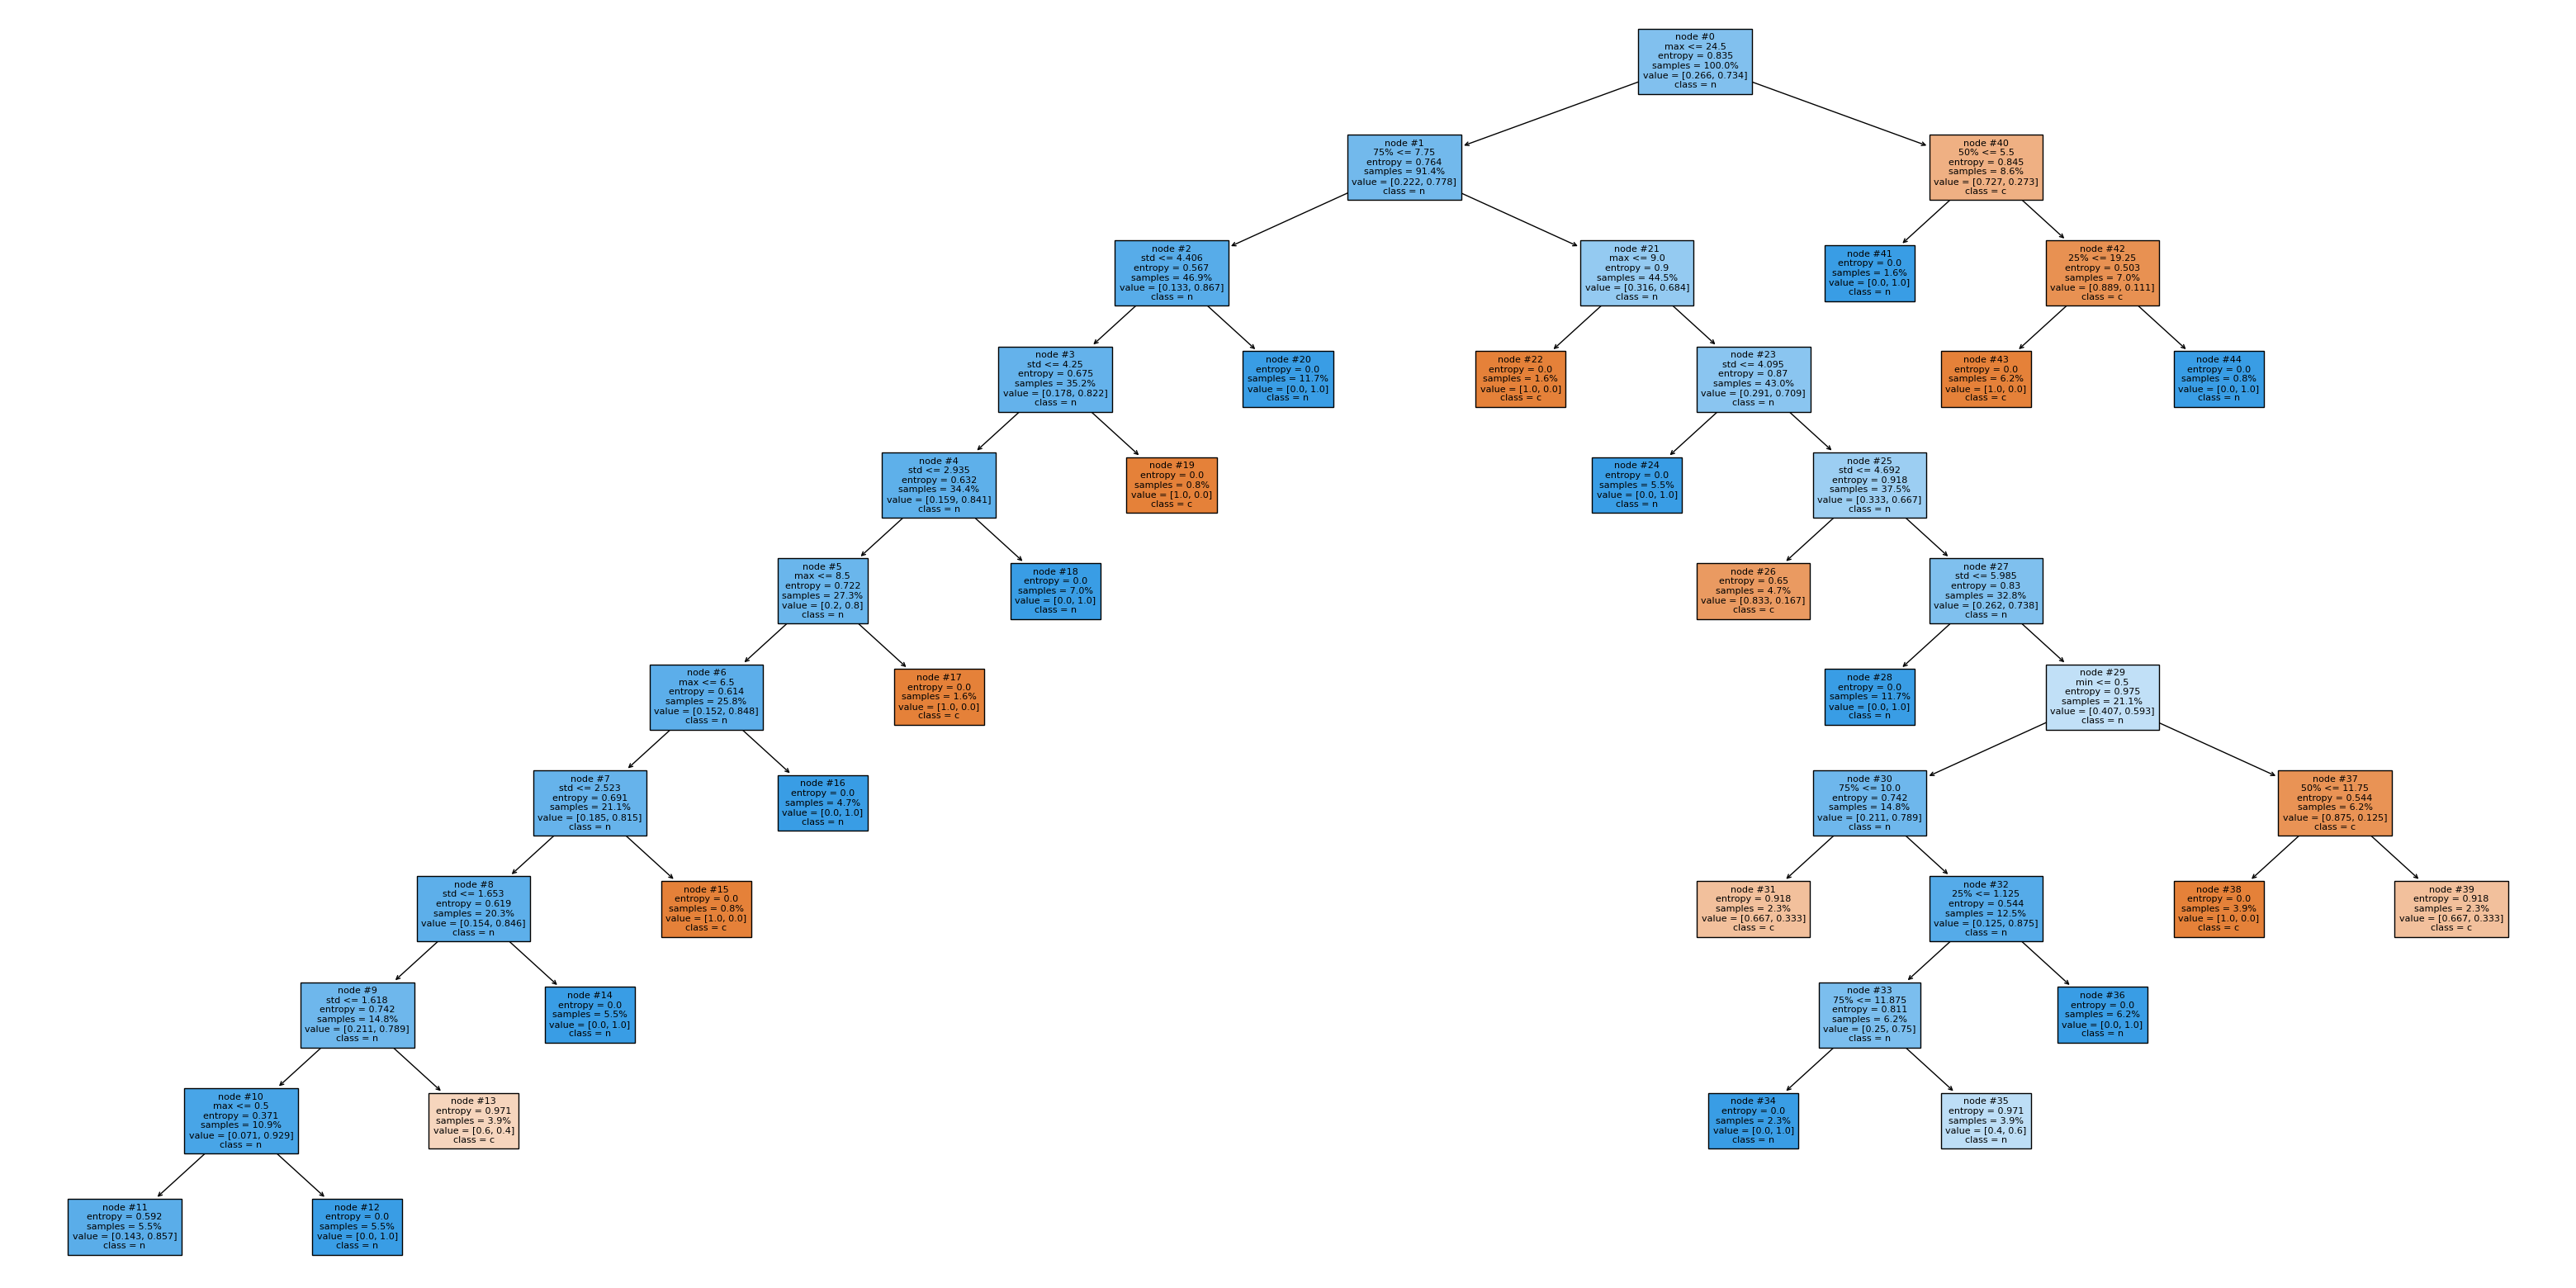

In [19]:
plt.figure(figsize = (40,20))
plt.rcParams.update({'font.size': 8})
tree.plot_tree(clf,feature_names = X.columns, fontsize = 8, filled = True, node_ids = True, proportion = True, class_names = ['c','n'])
plt.savefig('entropy_11_5_cn.png')
plt.show()

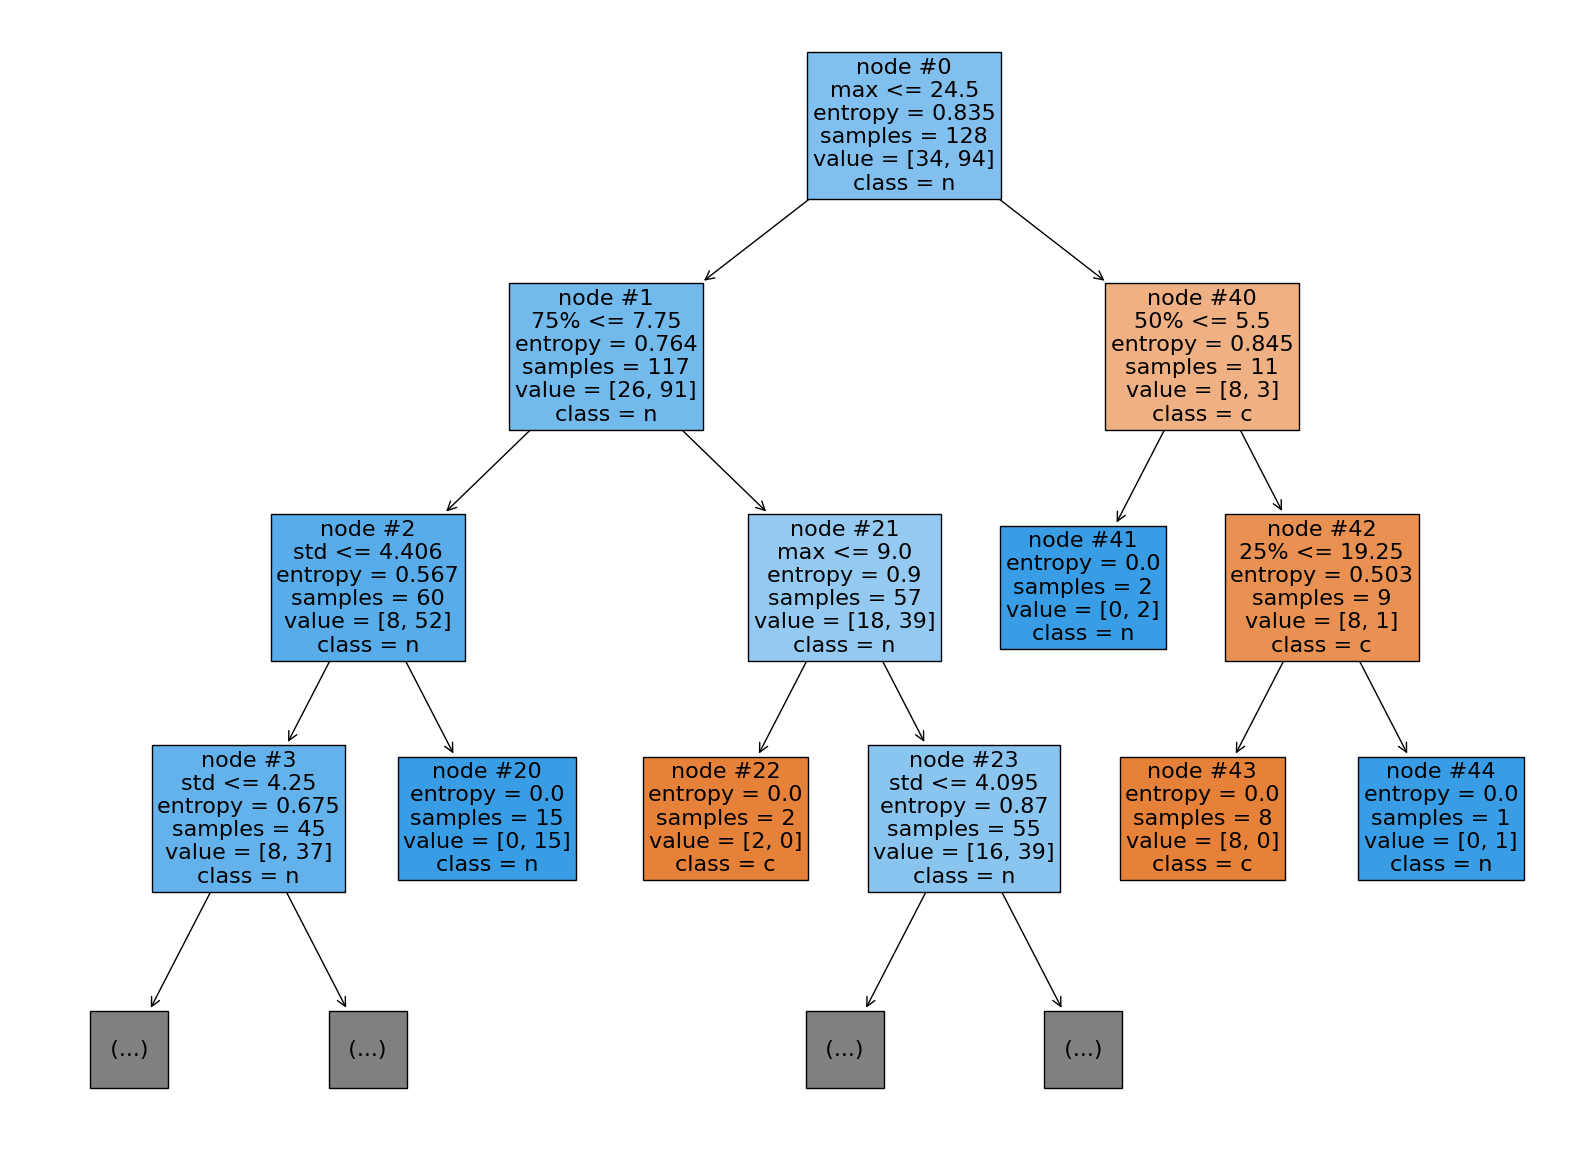

In [20]:
plt.figure(figsize = (20,15))
plt.rcParams.update({'font.size': 20})
tree.plot_tree(clf,
               feature_names = X.columns,
               max_depth = 3,
               fontsize = 16,
               filled = True,
               node_ids = True,
               proportion = False,
               class_names = ['c','n'])
plt.savefig('entropy_11_5_cn_sh.png')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cfx = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cfx)

[[ 3 14]
 [ 9 29]]


In [22]:
se = cfx[0][0]/(cfx[0][0]+cfx[1][0])
sp = cfx[1][1]/(cfx[0][1]+cfx[1][1])
print('sensitivity:',se)
print('specificity:',sp)

sensitivity: 0.25
specificity: 0.6744186046511628


In [23]:
#day?????

In [53]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [54]:
###gride search for SVC
parameters = {'C' : [1,0.1,0.01] , 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
scoring = {'accuracy' : make_scorer(accuracy_score), 'f1' : make_scorer(f1_score,pos_label=0), 'precision' : make_scorer(precision_score,pos_label=0,zero_division = 0), 'Sensitivity': make_scorer(recall_score,pos_label=0, zero_division = 0),'Specificity': make_scorer(recall_score,pos_label=1)}
model = SVC(random_state = 42)
clf = GridSearchCV(model, parameters,
                   scoring = scoring,
                   refit = 'Sensitivity',
                   cv = 5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='Sensitivity',
             scoring={'Sensitivity': make_scorer(recall_score, response_method='predict', pos_label=0, zero_division=0),
                      'Specificity': make_scorer(recall_score, response_method='predict', pos_label=1),
                      'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', pos_label=0),
                      'precision': make_scorer(precision_score, response_method='predict', pos_label=0, zero_division=0)})

In [55]:
for i,j,k,l,m,n in zip(clf.cv_results_['params'],clf.cv_results_['mean_test_accuracy'],
                    clf.cv_results_['mean_test_f1'],
                    clf.cv_results_['mean_test_precision'],
                    clf.cv_results_['mean_test_Sensitivity'],
                    clf.cv_results_['mean_test_Specificity']):
    print(f'Parameter[{i}], accuracy = {"%.2f" %j}, f1 = {"%.2f" %k}, precision = {"%.2f" %l}, Sensitivity = {"%.2f" %m}, Specificity = {"%.2f" %n}')

Parameter[{'C': 1, 'kernel': 'linear'}], accuracy = 0.73, f1 = 0.00, precision = 0.00, Sensitivity = 0.00, Specificity = 0.99
Parameter[{'C': 1, 'kernel': 'poly'}], accuracy = 0.77, f1 = 0.34, precision = 0.73, Sensitivity = 0.24, Specificity = 0.96
Parameter[{'C': 1, 'kernel': 'rbf'}], accuracy = 0.75, f1 = 0.26, precision = 0.50, Sensitivity = 0.18, Specificity = 0.96
Parameter[{'C': 1, 'kernel': 'sigmoid'}], accuracy = 0.66, f1 = 0.19, precision = 0.28, Sensitivity = 0.15, Specificity = 0.85
Parameter[{'C': 0.1, 'kernel': 'linear'}], accuracy = 0.73, f1 = 0.00, precision = 0.00, Sensitivity = 0.00, Specificity = 0.99
Parameter[{'C': 0.1, 'kernel': 'poly'}], accuracy = 0.75, f1 = 0.26, precision = 0.50, Sensitivity = 0.18, Specificity = 0.96
Parameter[{'C': 0.1, 'kernel': 'rbf'}], accuracy = 0.73, f1 = 0.00, precision = 0.00, Sensitivity = 0.00, Specificity = 1.00
Parameter[{'C': 0.1, 'kernel': 'sigmoid'}], accuracy = 0.73, f1 = 0.00, precision = 0.00, Sensitivity = 0.00, Specificity

In [56]:
clf = SVC(C = 1, kernel = 'poly', random_state = 42)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.02


In [57]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cfx = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cfx)

[[ 0 17]
 [ 4 34]]


In [58]:
se = cfx[0][0]/(cfx[0][0]+cfx[1][0])
sp = cfx[1][1]/(cfx[0][1]+cfx[1][1])
print('sensitivity:',se)
print('specificity:',sp)

sensitivity: 0.0
specificity: 0.6666666666666666


In [28]:
clf = MLPClassifier(random_state=1, max_iter=5000)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.65 accuracy with a standard deviation of 0.04


In [29]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cfx = confusion_matrix(y_test, y_pred, labels = [0,1])
print(cfx)

[[ 4 13]
 [ 4 34]]


In [30]:
se = cfx[0][0]/(cfx[0][0]+cfx[1][0])
sp = cfx[1][1]/(cfx[0][1]+cfx[1][1])
print('sensitivity:',se)
print('specificity:',sp)

sensitivity: 0.5
specificity: 0.723404255319149


In [59]:
##day basis
y_pred = clf.predict(X)
df60min_summary['pred'] = y_pred
df60min_summary

,class,event,name_,level_3,count,mean,std,min,25%,50%,75%,max,pred
0,crush,0.0,cam1_080424,0,6.0,12.166667,4.262237,9.0,9.25,10.5,13.25,20.0,0
1,crush,0.0,cam1_080424,1,6.0,19.000000,8.294577,4.0,16.75,21.5,24.75,26.0,0
2,crush,0.0,cam1_080424,2,6.0,9.666667,5.354126,2.0,6.50,11.0,11.75,17.0,1
3,crush,0.0,cam1_080424,3,6.0,14.500000,11.166915,0.0,7.00,13.5,23.75,28.0,0
4,crush,0.0,cam1_080424,4,6.0,6.333333,4.412105,0.0,4.00,6.5,9.00,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,normal,NaN,3110,10,6.0,4.333333,3.011091,0.0,2.50,4.5,6.50,8.0,1
215,normal,NaN,3110,11,6.0,8.666667,5.240865,4.0,5.00,6.5,11.75,17.0,1
216,normal,NaN,3110,12,6.0,9.333333,12.323419,0.0,2.00,5.0,10.25,33.0,1
217,normal,NaN,3110,13,6.0,13.333333,5.202563,4.0,11.75,15.0,16.75,18.0,1


In [60]:
a = df60min_summary.groupby(['class','name_']).count()
b = df60min_summary.groupby(['class','name_']).sum()

a.drop(columns = ['event', 'level_3', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'] , inplace = True)
b.drop(columns = ['event', 'level_3', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'] , inplace = True)

b['total'] = a['pred']
b['Pos_%'] = (b['total']-b['pred'])/ b['total']

In [33]:
b

pred  total     Pos_%
class  name_                              
crush  cam1_070624      5      7  0.285714
       cam1_080424      2     10  0.800000
       cam1_090624      4      7  0.428571
       cam1_100624      2      7  0.714286
       cam2_200524      2      7  0.714286
       cam2_220524      2      6  0.666667
       cam_1_220624     5      7  0.285714
normal 020324           6      6  0.000000
       030324           6      7  0.142857
       040324           6      7  0.142857
       050324           6      6  0.000000
       131123          14     14  0.000000
       131123_2        14     15  0.066667
       1410             6      6  0.000000
       1910             9      9  0.000000
       201123          13     14  0.071429
       201123_2        16     17  0.058824
       2409             9      9  0.000000
       270324           7      7  0.000000
       3110            14     15  0.066667